In [23]:
#Khai báo thu viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from llama_index.core.evaluation.benchmarks.hotpotqa import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report


import warnings
warnings.filterwarnings('ignore') # ignore the warning


In [25]:
DATASET_PATH = r"D:/TTNT/data/dataset.csv"
df = pd.read_csv(DATASET_PATH)
print(f"Kích thước: {df.shape[0]} hàng x {df.shape[1]} cột")
print(df.info())
df.head()

Kích thước: 4000 hàng x 24 cột
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_mAh         4000 non-null   int64  
 1   screen_height_cm    4000 non-null   int64  
 2   screen_width_px     4000 non-null   int64  
 3   weight_g            4000 non-null   int64  
 4   internal_memory_GB  4000 non-null   int64  
 5   color_variety       4000 non-null   int64  
 6   has_4g              4000 non-null   int64  
 7   screen_height_px    4000 non-null   int64  
 8   has_wifi            4000 non-null   int64  
 9   talk_time_hr        4000 non-null   int64  
 10  primary_camera_mp   4000 non-null   int64  
 11  brand_popularity    4000 non-null   int64  
 12  thickness_cm        4000 non-null   float64
 13  screen_width_cm     4000 non-null   int64  
 14  year_release        4000 non-null   int64  
 15  ram_MB              4000

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
0,842,9,756,188,7,5,0,20,1,19,...,2016,2549,1,2,0,0,2.2,0,0,1
1,1021,17,1988,136,53,2,1,905,0,7,...,2019,2631,0,3,1,1,0.5,1,1,2
2,563,11,1716,145,41,1,1,1263,0,9,...,2016,2603,2,5,1,1,0.5,1,1,2
3,615,16,1786,131,10,2,0,1216,0,11,...,2016,2769,0,6,1,1,2.5,0,0,2
4,1821,8,1212,141,44,5,1,1208,0,15,...,2020,1411,13,2,1,1,1.2,1,0,1


In [26]:
#Kiểm tra dữ liệu thiếu
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({
    'Số giá trị thiếu': missing,
    'Tỉ lệ (%) giá trị thiếu trên từng cột': missing_percent.round(2)
})
print(missing_table)


                    Số giá trị thiếu  Tỉ lệ (%) giá trị thiếu trên từng cột
battery_mAh                        0                                    0.0
screen_height_cm                   0                                    0.0
screen_width_px                    0                                    0.0
weight_g                           0                                    0.0
internal_memory_GB                 0                                    0.0
color_variety                      0                                    0.0
has_4g                             0                                    0.0
screen_height_px                   0                                    0.0
has_wifi                           0                                    0.0
talk_time_hr                       0                                    0.0
primary_camera_mp                  0                                    0.0
brand_popularity                   0                                    0.0
thickness_cm

In [27]:
duplicates = df[df.duplicated(keep=False)]
print(f"Số hàng trùng: {len(duplicates)}")
display(duplicates)


Số hàng trùng: 14


,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
182,1082,6,1191,198,38,3,0,986,1,17,...,2019,2337,0,8,0,0,0.8,1,0,2
203,671,6,1182,105,30,1,0,852,0,15,...,2023,2504,10,7,0,1,0.9,0,1,2
228,1578,19,1226,138,37,3,1,411,1,3,...,2020,2458,2,4,0,1,1.9,0,1,2
249,1617,9,1038,105,30,1,1,246,0,10,...,2021,829,3,2,1,1,1.3,0,1,0
374,1334,10,1974,115,42,5,1,1187,0,8,...,2015,2542,5,5,1,1,2.4,0,0,3
626,1620,6,1033,185,30,2,1,832,0,18,...,2019,606,0,3,1,1,2.2,0,1,0
1852,648,10,1811,195,60,2,1,931,0,4,...,2020,819,1,4,1,1,1.8,0,0,0
2182,1082,6,1191,198,38,3,0,986,1,17,...,2019,2337,0,8,0,0,0.8,1,0,2
2203,671,6,1182,105,30,1,0,852,0,15,...,2023,2504,10,7,0,1,0.9,0,1,2
2228,1578,19,1226,138,37,3,1,411,1,3,...,2020,2458,2,4,0,1,1.9,0,1,2


In [33]:
duplicates_count = df.duplicated().sum()
print(f"Số lượng dòng trùng hoàn toàn: {duplicates_count}")
# Nếu có, loại bỏ các dòng trùng
if duplicates_count > 0:
    df = df.drop_duplicates(keep='first')
    print(f"Đã loại bỏ {duplicates_count} dòng trùng. Kích thước dữ liệu mới: {df.shape}")
else:
    print("Không có bất kỳ dữ liệu dòng trùng nào.")


Số lượng dòng trùng hoàn toàn: 0
Không có bất kỳ dữ liệu dòng trùng nào.


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_mAh,3993.0,1238.548460,439.432486,501.0,852.0,1225.0,1615.0,1998.0
screen_height_cm,3993.0,12.311545,4.210887,5.0,9.0,12.0,16.0,19.0
screen_width_px,3993.0,1251.341598,432.252525,500.0,874.0,1247.0,1633.0,1998.0
weight_g,3993.0,140.234160,35.385694,80.0,109.0,141.0,170.0,200.0
internal_memory_GB,3993.0,32.035813,18.152769,2.0,16.0,32.0,48.0,64.0
color_variety,3993.0,3.015277,1.433572,1.0,2.0,3.0,4.0,5.0
has_4g,3993.0,0.521162,0.499615,0.0,0.0,1.0,1.0,1.0
screen_height_px,3993.0,644.875282,443.893131,0.0,282.0,564.0,947.0,1960.0
has_wifi,3993.0,0.507388,0.500008,0.0,0.0,1.0,1.0,1.0
talk_time_hr,3993.0,11.011520,5.462925,2.0,6.0,11.0,16.0,20.0


In [32]:
df['price_range'].value_counts()

price_range
1    1000
3     999
2     997
0     997
Name: count, dtype: int64

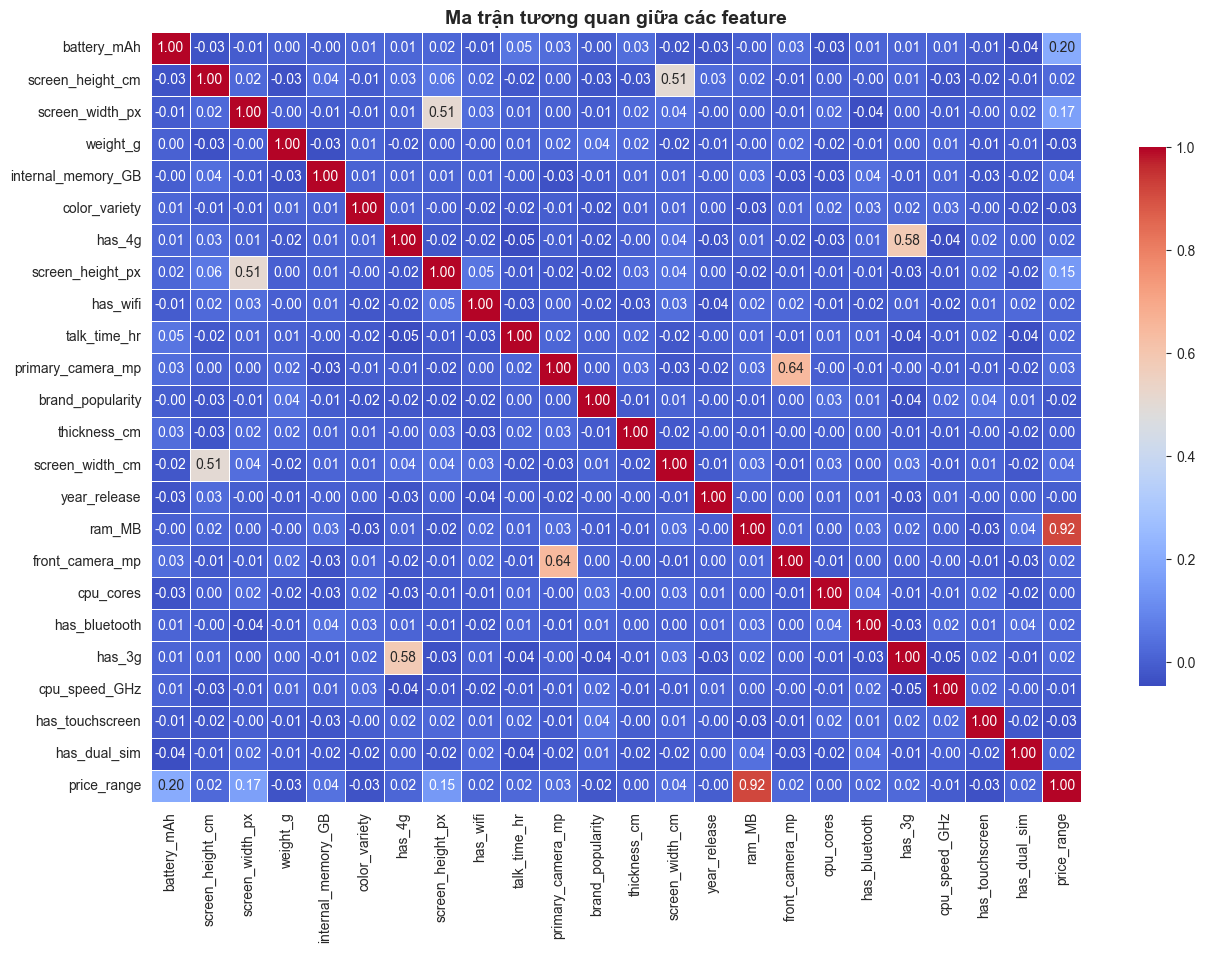

In [35]:
#Vẽ ma trận tương quan
plt.figure(figsize=(15,10))
corr = df.corr(numeric_only=True)
# Vẽ heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': .7}
)

plt.title("Ma trận tương quan giữa các feature", fontsize=14, fontweight='bold')
plt.show()

In [37]:
target_corr = corr['price_range'].drop('price_range').sort_values(ascending=False)
print("Top 10 đặc trưng tương quan mạnh nhất với price_range:\n")
display(target_corr.head(10).to_frame('Hệ số tương quan'))

Top 10 đặc trưng tương quan mạnh nhất với price_range:



,Hệ số tương quan
ram_MB,0.917042
battery_mAh,0.201218
screen_width_px,0.165662
screen_height_px,0.148644
internal_memory_GB,0.044697
screen_width_cm,0.037976
primary_camera_mp,0.032192
has_3g,0.024100
screen_height_cm,0.022429
talk_time_hr,0.021982


In [50]:
# Lọc các feature có hệ số tương quan với price_range lớn hơn ngưỡng (ví dụ 0.05)
threshold = 0.05
selected_numeric_features = target_corr[target_corr > threshold].index.tolist()

# In ra các feature numeric đã chọn
print(f"Feature numeric có tương quan lớn hơn {threshold} với price_range:")
print(selected_numeric_features)

# Lọc DataFrame chỉ giữ lại các feature đã chọn cộng với cột price_range
filtered_numeric_df = df[selected_numeric_features + ['price_range']]

# Hiển thị kết quả lọc
display(filtered_numeric_df.head())


Feature numeric có tương quan lớn hơn 0.05 với price_range:
['battery_mAh', 'screen_width_px', 'screen_height_px', 'ram_MB']


,battery_mAh,screen_width_px,screen_height_px,ram_MB,price_range
0,842,756,20,2549,1
1,1021,1988,905,2631,2
2,563,1716,1263,2603,2
3,615,1786,1216,2769,2
4,1821,1212,1208,1411,1


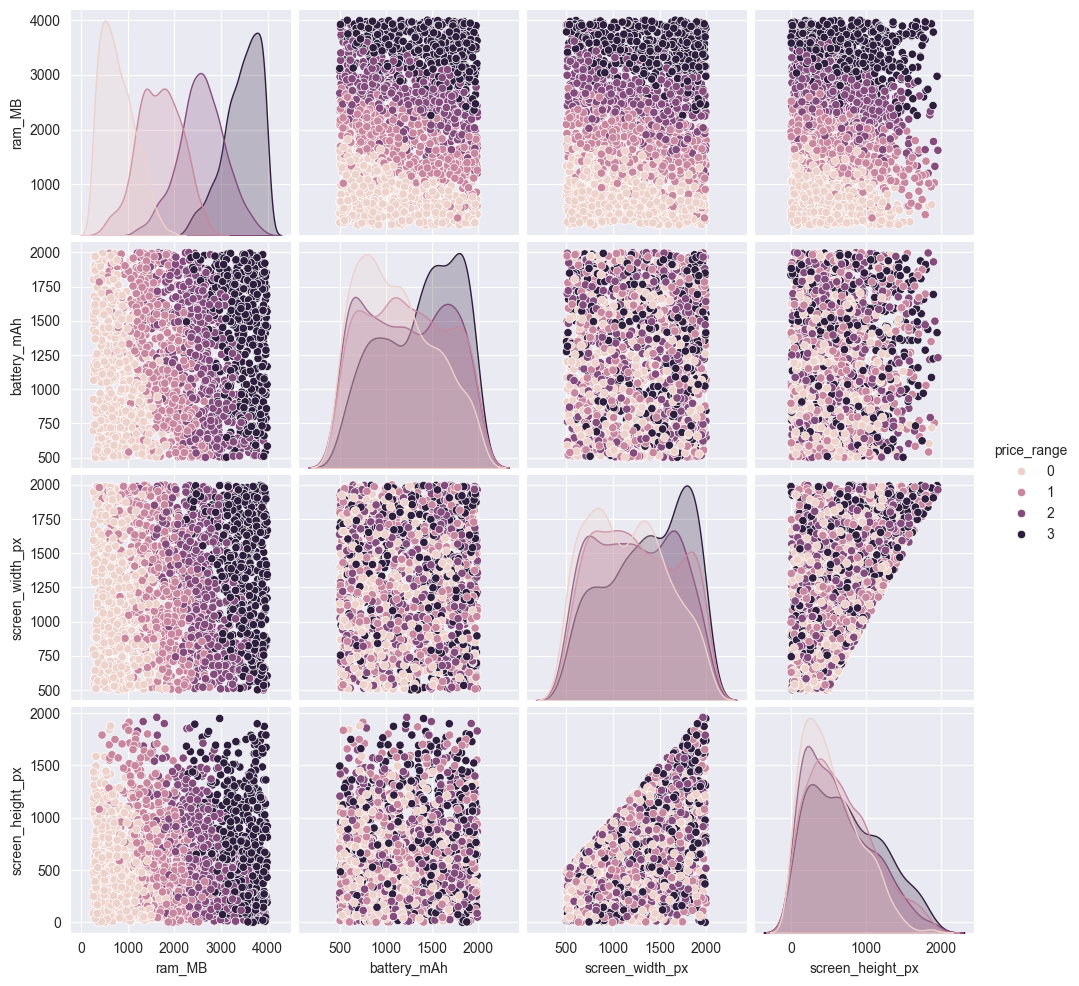

In [38]:
sns.pairplot(df, vars=['ram_MB', 'battery_mAh', 'screen_width_px', 'screen_height_px'], hue='price_range')
plt.show()


Phân tích cột has_3g:
has_3g
1    3040
0     953
Name: count, dtype: int64


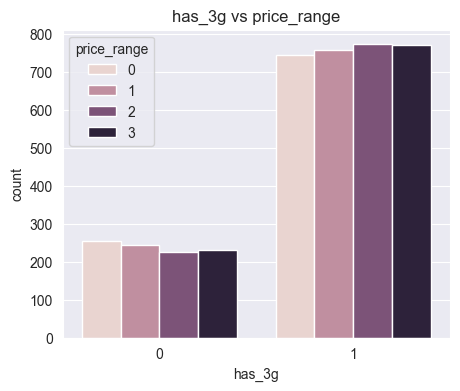

Tỷ lệ % theo price_range:
price_range      0      1      2      3
has_3g                                 
0            26.65  25.60  23.61  24.13
1            24.44  24.87  25.39  25.30

Phân tích cột has_4g:
has_4g
1    2081
0    1912
Name: count, dtype: int64


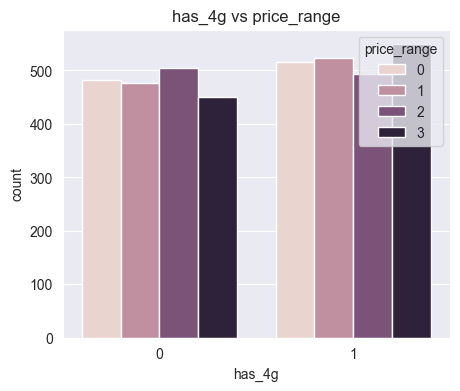

Tỷ lệ % theo price_range:
price_range      0      1      2      3
has_4g                                 
0            25.21  24.90  26.36  23.54
1            24.75  25.18  23.69  26.38

Phân tích cột has_wifi:
has_wifi
1    2026
0    1967
Name: count, dtype: int64


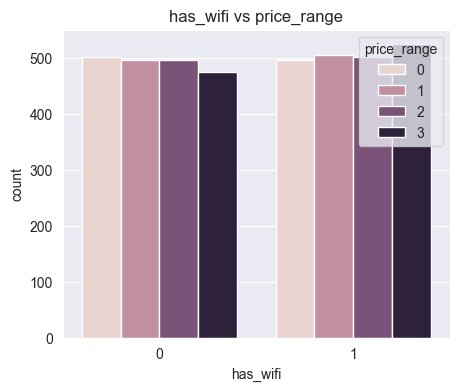

Tỷ lệ % theo price_range:
price_range      0      1      2      3
has_wifi                               
0            25.47  25.22  25.17  24.15
1            24.48  24.88  24.78  25.86

Phân tích cột has_bluetooth:
has_bluetooth
0    2017
1    1976
Name: count, dtype: int64


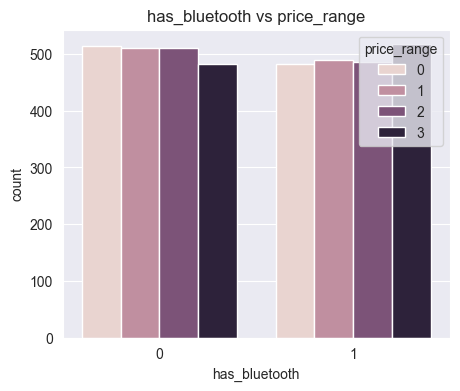

Tỷ lệ % theo price_range:
price_range        0      1      2      3
has_bluetooth                            
0              25.48  25.29  25.33  23.90
1              24.44  24.80  24.60  26.16

Phân tích cột has_touchscreen:
has_touchscreen
1    2011
0    1982
Name: count, dtype: int64


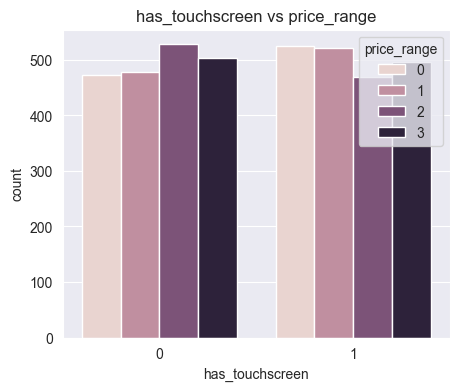

Tỷ lệ % theo price_range:
price_range          0      1      2      3
has_touchscreen                            
0                23.86  24.12  26.64  25.38
1                26.06  25.96  23.32  24.66

Phân tích cột has_dual_sim:
has_dual_sim
1    2034
0    1959
Name: count, dtype: int64


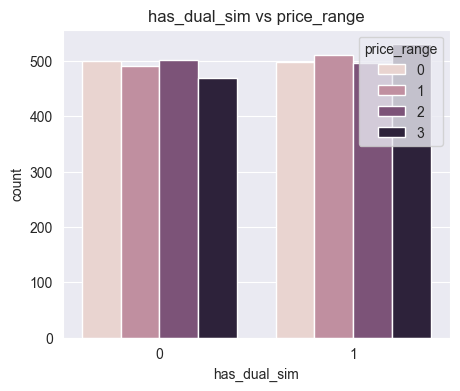

Tỷ lệ % theo price_range:
price_range       0      1      2      3
has_dual_sim                            
0             25.47  25.01  25.57  23.94
1             24.48  25.07  24.39  26.06


In [44]:
cat_cols = ['has_3g', 'has_4g', 'has_wifi', 'has_bluetooth','has_touchscreen', 'has_dual_sim']
for col in cat_cols:
    print(f"\nPhân tích cột {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue='price_range')
    plt.title(f'{col} vs price_range')
    plt.show()

    table = pd.crosstab(df[col], df['price_range'], normalize='index') * 100
    print("Tỷ lệ % theo price_range:")
    print(table.round(2))

In [47]:
binary_cols = ['has_3g','has_4g','has_wifi','has_bluetooth','has_touchscreen','has_dual_sim']
diff_score = {}

for col in binary_cols:
    tab = pd.crosstab(df[col], df['price_range'], normalize='index') * 100
    diff = abs(tab.loc[0] - tab.loc[1]).mean()  # trung bình chênh lệch %
    diff_score[col] = round(diff, 2)

pd.Series(diff_score).sort_values(ascending=False)

has_touchscreen    2.02
has_4g             1.57
has_3g             1.47
has_bluetooth      1.13
has_dual_sim       1.09
has_wifi           0.86
dtype: float64

In [51]:
diff_score = {
    'has_touchscreen': 2.02,
    'has_4g': 1.57,
    'has_3g': 1.47,
    'has_bluetooth': 1.13,
    'has_dual_sim': 1.09,
    'has_wifi': 0.86
}

# Chọn các feature có độ lệch lớn hơn 1.4
selected_features = [feature for feature, score in diff_score.items() if score > 1.4]
print("Các feature binary quan trọng cần giữ lại:", selected_features)

# Lọc DataFrame chỉ giữ lại các feature đã chọn
filtered_df = df[selected_features + ['price_range']]  # Thêm 'price_range' vào vì là mục tiêu

# Hiển thị DataFrame đã lọc
display(filtered_df.head())


Các feature binary quan trọng cần giữ lại: ['has_touchscreen', 'has_4g', 'has_3g']


,has_touchscreen,has_4g,has_3g,price_range
0,0,0,0,1
1,1,1,1,2
2,1,1,1,2
3,0,0,1,2
4,1,1,1,1


In [52]:
# Feature numeric cần giữ lại
numeric_features = ['battery_mAh', 'screen_width_px', 'screen_height_px', 'ram_MB']

# Feature binary cần giữ lại
binary_features = ['has_touchscreen', 'has_4g', 'has_3g']

# Kết hợp tất cả feature quan trọng với cột price_range
selected_features = numeric_features + binary_features + ['price_range']

# Lọc DataFrame chỉ giữ lại các feature đã chọn
filtered_df = df[selected_features]

# Hiển thị DataFrame đã lọc
display(filtered_df.head())


,battery_mAh,screen_width_px,screen_height_px,ram_MB,has_touchscreen,has_4g,has_3g,price_range
0,842,756,20,2549,0,0,0,1
1,1021,1988,905,2631,1,1,1,2
2,563,1716,1263,2603,1,1,1,2
3,615,1786,1216,2769,0,0,1,2
4,1821,1212,1208,1411,1,1,1,1


In [54]:
#Feature Engineering
df['screen_area'] = df['screen_width_px'] * df['screen_height_px']
df['screen_ratio'] = df['screen_height_px'] / df['screen_width_px']
df['battery_per_ram'] = df['battery_mAh'] / df['ram_MB']
df['has_4g_3g_combined'] = df['has_4g'] + df['has_3g']

# Kiểm tra nhanh
display(df[['battery_mAh', 'ram_MB', 'screen_width_px', 'screen_height_px',
            'screen_area', 'screen_ratio', 'battery_per_ram',
            'has_4g', 'has_3g', 'has_4g_3g_combined']].head())


,battery_mAh,ram_MB,screen_width_px,screen_height_px,screen_area,screen_ratio,battery_per_ram,has_4g,has_3g,has_4g_3g_combined
0,842,2549,756,20,15120,0.026455,0.330326,0,0,0
1,1021,2631,1988,905,1799140,0.455231,0.388065,1,1,2
2,563,2603,1716,1263,2167308,0.736014,0.216289,1,1,2
3,615,2769,1786,1216,2171776,0.680851,0.222102,0,1,1
4,1821,1411,1212,1208,1464096,0.996700,1.290574,1,1,2


In [106]:
#Chia dữ liệu trước khi scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Xác định X, y
X = df.drop('price_range', axis=1)
y = df['price_range']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [107]:
numeric_scale = ['battery_mAh', 'screen_width_px', 'screen_height_px', 'ram_MB',
                 'screen_area', 'screen_ratio', 'battery_per_ram']

# Tạo scaler
scaler = StandardScaler()

# Fit scaler trên train
X_train[numeric_scale] = scaler.fit_transform(X_train[numeric_scale])

# Transform test
X_test[numeric_scale] = scaler.transform(X_test[numeric_scale])
print("Mean sau scaling (train):\n", X_train[numeric_scale].mean().round(3))
print("\nStd sau scaling (train):\n", X_train[numeric_scale].std().round(3))
print("\nMean (test):\n", X_test[numeric_scale].mean().round(3))
print("\nStd (test):\n", X_test[numeric_scale].std().round(3))

Mean sau scaling (train):
 battery_mAh         0.0
screen_width_px     0.0
screen_height_px    0.0
ram_MB             -0.0
screen_area        -0.0
screen_ratio        0.0
battery_per_ram    -0.0
dtype: float64

Std sau scaling (train):
 battery_mAh         1.0
screen_width_px     1.0
screen_height_px    1.0
ram_MB              1.0
screen_area         1.0
screen_ratio        1.0
battery_per_ram     1.0
dtype: float64

Mean (test):
 battery_mAh         0.036
screen_width_px     0.009
screen_height_px    0.037
ram_MB             -0.013
screen_area         0.039
screen_ratio        0.024
battery_per_ram     0.049
dtype: float64

Std (test):
 battery_mAh         1.035
screen_width_px     1.012
screen_height_px    1.030
ram_MB              1.013
screen_area         1.036
screen_ratio        0.999
battery_per_ram     1.094
dtype: float64


In [108]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Kích thước tập train: (2994, 27)
Kích thước tập test: (999, 27)

Train Accuracy: 1.0000, Test Accuracy: 0.9840
Train F1: 1.0000, Test F1: 0.9839
Accuracy: 0.0160,F1: 0.0161

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       0.99      0.97      0.98       250
           2       0.97      0.97      0.97       249
           3       0.98      1.00      0.99       250

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



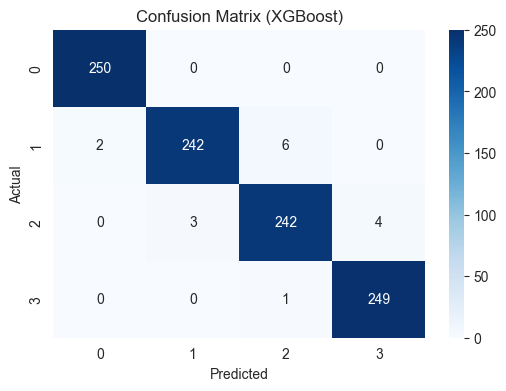

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

# Khởi tạo mô hình
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    predictor='cpu_predictor'
)
# Train Final Model
xgb_model.fit(X_train, y_train)

# Dự đoán
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Kiểm tra Overfitting
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nTrain Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
print(f"Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")
print(f"Accuracy: {train_acc - test_acc:.4f}, F1: {train_f1 - test_f1:.4f}")
# Đánh giá mô hình
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

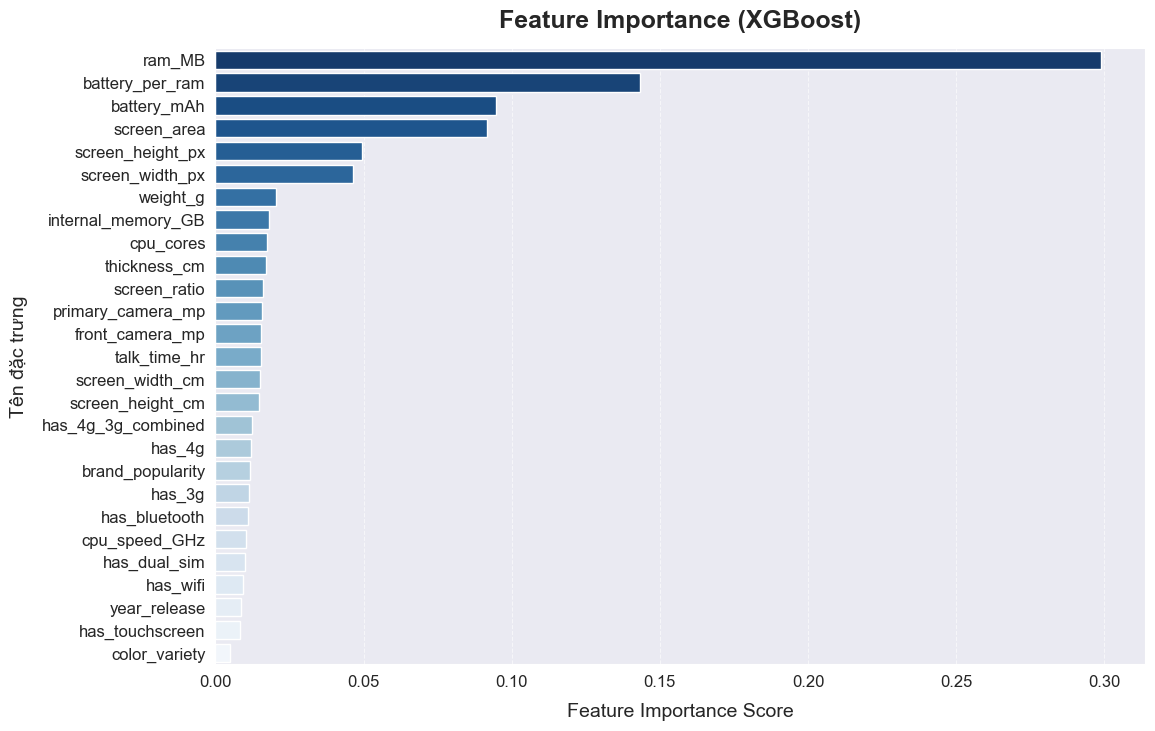

In [114]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    palette="Blues_r"
)

plt.title("Feature Importance (XGBoost)", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Feature Importance Score", fontsize=14, labelpad=10)
plt.ylabel("Tên đặc trưng", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


Kích thước tập train: (2994, 27)
Kích thước tập test: (999, 27)

Thời gian huấn luyện: 0.91 giây

Train Accuracy (RF): 1.0000, Test Accuracy (RF): 0.9710
Train F1 (RF): 1.0000, Test F1 (RF): 0.9708
Accuracy: 0.0290,F1: 0.0292

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       0.97      0.93      0.95       250
           2       0.94      0.96      0.95       249
           3       0.99      0.99      0.99       250

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



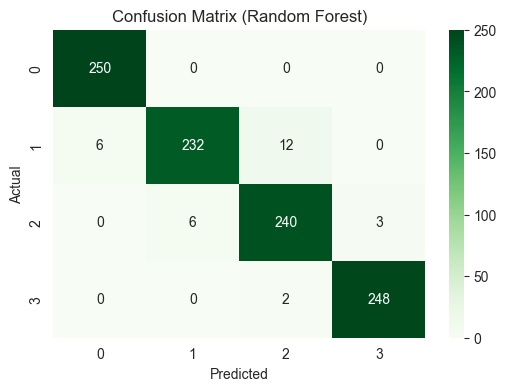

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

# Khởi tạo mô hình
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=15,
    n_jobs=-1,
    min_samples_split=2,
    min_samples_leaf=1
)

# Huấn luyện mô hình
start = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start
print(f"\nThời gian huấn luyện: {train_time:.2f} giây")

# Dự đoán
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Kiểm tra Overfitting

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print(f"\nTrain Accuracy (RF): {train_acc_rf:.4f}, Test Accuracy (RF): {test_acc_rf:.4f}")
print(f"Train F1 (RF): {train_f1_rf:.4f}, Test F1 (RF): {test_f1_rf:.4f}")
print(f"Accuracy: {train_acc_rf - test_acc_rf:.4f},F1: {train_f1_rf - test_f1_rf:.4f}")

# Đánh giá mô hình

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


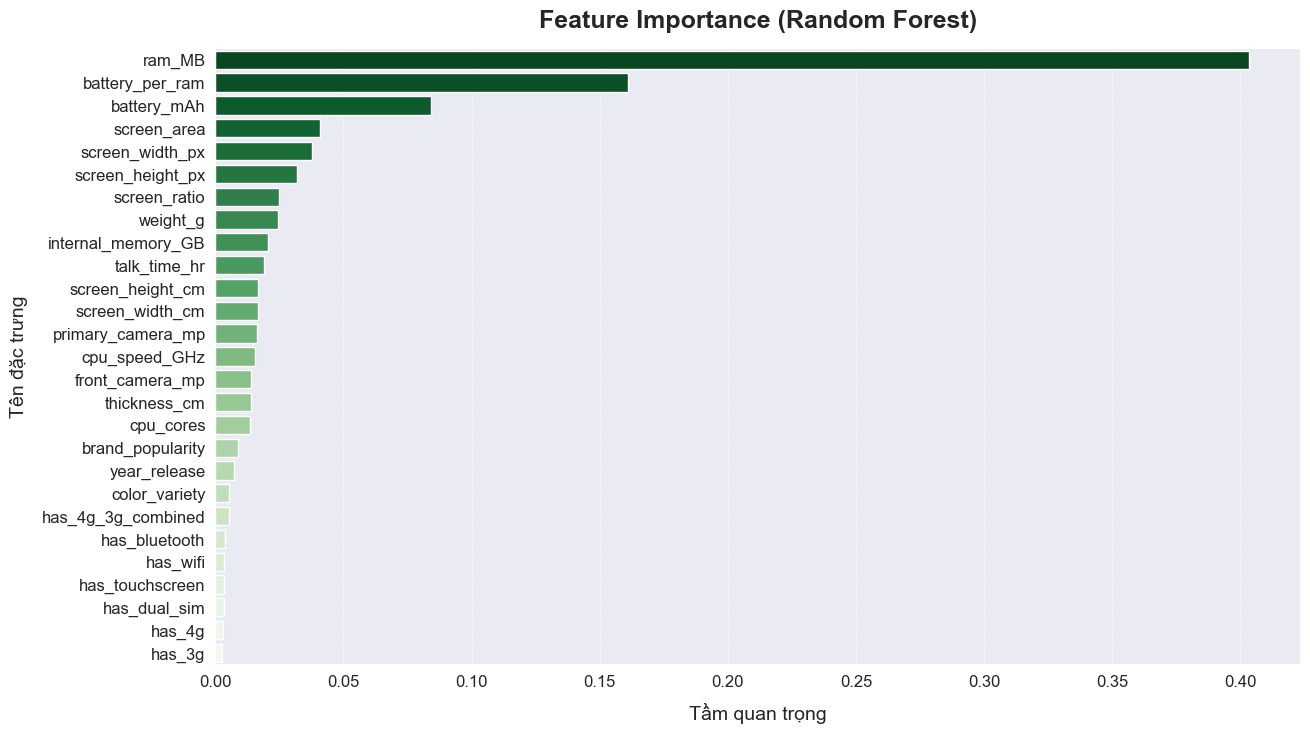

In [86]:
import pandas as pd

rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=rf_importance.values,
    y=rf_importance.index,
    palette='Greens_r')
plt.title("Feature Importance (Random Forest)", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Tầm quan trọng", fontsize=14, labelpad=10)
plt.ylabel("Tên đặc trưng", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


,Model,Train Accuracy,Test Accuracy,Train F1 (weighted),Test F1 (weighted)
0,XGBoost,1.0,0.984,1.0,0.9839
1,Random Forest,1.0,0.971,1.0,0.9708


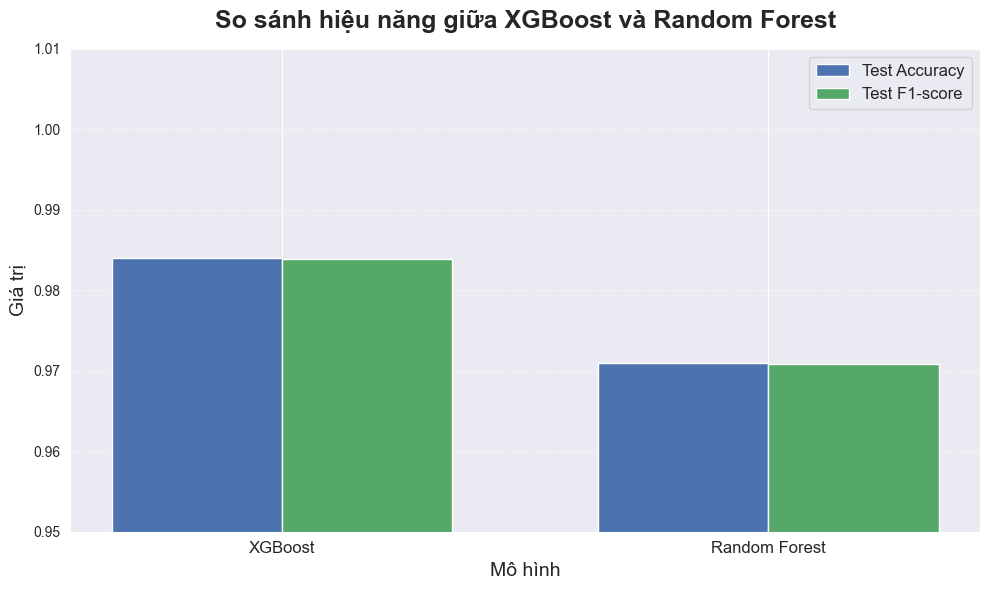

In [127]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'Train Accuracy': [train_acc, train_acc_rf],
    'Test Accuracy': [test_acc, test_acc_rf],
    'Train F1 (weighted)': [train_f1, train_f1_rf],
    'Test F1 (weighted)': [test_f1, test_f1_rf],
}).round(4)

# Sắp xếp theo Test F1 (chuẩn)
results = results.sort_values(by='Test F1 (weighted)', ascending=False).reset_index(drop=True)
display(results)

# === Biểu đồ ===
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(results['Model']))

plt.bar([i - bar_width/2 for i in x], results['Test Accuracy'], width=bar_width, label='Test Accuracy', color='#4C72B0')
plt.bar([i + bar_width/2 for i in x], results['Test F1 (weighted)'], width=bar_width, label='Test F1-score', color='#55A868')

# Format đẹp
plt.title("So sánh hiệu năng giữa XGBoost và Random Forest", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Mô hình", fontsize=14)
plt.ylabel("Giá trị", fontsize=14)
plt.xticks(ticks=x, labels=results['Model'], fontsize=12)
plt.ylim(0.95, 1.01)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [130]:
import joblib

# Lưu mô hình XGBoost
joblib.dump(xgb_model, r"D:/TTNT/models/xgb_model.pkl")

# Lưu mô hình Random Forest
joblib.dump(rf_model, r"D:/TTNT/models/rf_model.pkl")

print("Đã lưu mô hình XGBoost và Random Forest thành công!")


Đã lưu mô hình XGBoost và Random Forest thành công!
